In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Hotel_Reviews.csv')
df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397.0,1403.0,Only the park outside of the hotel was beauti...,11.0,7.0,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0.0,1403.0,No real complaints the hotel was great great ...,105.0,7.0,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42.0,1403.0,Location was good and staff were ok It is cut...,21.0,9.0,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210.0,1403.0,Great location in nice surroundings the bar a...,26.0,1.0,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140.0,1403.0,Amazing location and building Romantic setting,8.0,3.0,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455686,Southampton Row Bloomsbury Camden London WC1B ...,224,7/31/2016,8.4,Grange Holborn Hotel,Ireland,Can t think of anything stayed here on severa...,11.0,845.0,Location size of room great facilities helpfu...,20.0,9.0,10.0,"[' Leisure trip ', ' Family with older childre...",368 day,51.519616,-0.121843
455687,Southampton Row Bloomsbury Camden London WC1B ...,224,7/21/2016,8.4,Grange Holborn Hotel,Israel,No Negative,0.0,845.0,We would like to recommend specifically the c...,25.0,1.0,7.5,"[' Leisure trip ', ' Family with older childre...",378 day,51.519616,-0.121843
455688,Southampton Row Bloomsbury Camden London WC1B ...,224,7/14/2016,8.4,Grange Holborn Hotel,United Kingdom,The spa was lovely but there was loud screami...,35.0,845.0,The bed was really comfy the shower was amazi...,15.0,1.0,7.5,"[' Leisure trip ', ' Group ', ' Double Room ',...",385 day,51.519616,-0.121843
455689,Southampton Row Bloomsbury Camden London WC1B ...,224,7/11/2016,8.4,Grange Holborn Hotel,Israel,Small storage room No breamkfast in the price...,45.0,845.0,Good location Helpfull staf the consiere gave...,14.0,4.0,7.1,"[' Leisure trip ', ' Family with older childre...",388 day,51.519616,-0.121843


# New Section

In [5]:

df1 = df.sample(50000,random_state=250)
df1.reset_index(inplace = True)

In [7]:


# df1.head()
df1 = df1.drop('index',axis=1)
df1.head()



,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,22 Hertsmere Road Tower Hamlets London E14 4ED...,930,12/9/2016,8.9,London Marriott Hotel West India Quay,United Kingdom,The grill restaurant was very below standard ...,32.0,2836.0,Bed was very cumphy good location staff were ...,11.0,1.0,5.8,"[' Leisure trip ', ' Couple ', ' Deluxe King R...",237 day,51.507271,-0.021121
1,Gutheil Schoder Gasse 7B 10 Favoriten 1100 Vie...,283,3/8/2017,8.3,Austria Trend Hotel Bosei Wien,Montenegro,Nothing,2.0,3287.0,Everything,2.0,4.0,9.6,"[' Business trip ', ' Solo traveler ', ' Class...",148 day,48.162974,16.340402
2,Mandeville Place Westminster Borough London W1...,495,8/19/2015,8.5,The Mandeville Hotel,Qatar,No Negative,0.0,2300.0,Concierge Madi is perfect and he is very helpful,10.0,1.0,7.9,"[' Leisure trip ', ' Couple ', ' Superior Doub...",715 day,51.516516,-0.150973
3,Joan Muyskenweg 10 Oost 1096 CJ Amsterdam Neth...,474,7/1/2016,8.2,Mercure Hotel Amsterdam City South,Spain,Parking was a bit expensive,6.0,3568.0,Staff was friendly Rooms where clean comforta...,13.0,1.0,9.6,"[' Leisure trip ', ' Group ', ' 2 rooms ', ' S...",398 day,52.335182,4.913869
4,Ferdinand Bolstraat 333 Oud Zuid 1072 LH Amste...,383,8/18/2016,8.9,Hotel Okura Amsterdam,New Zealand,There was water clogging in one of the wash b...,30.0,2295.0,lot of automation in the room plus the room i...,32.0,1.0,9.6,"[' Leisure trip ', ' Couple ', ' Superior Doub...",350 day,52.348764,4.893883


In [15]:
#append both positive and negative reviews
review = []
for row in range (0,len(df1)):
  review.append(''.join(str(x) for x in df1.iloc[row, [6,9]]))


In [20]:
review = pd.DataFrame(review)
review.head()

,0
0,The grill restaurant was very below standard ...
1,Nothing Everything
2,No Negative Concierge Madi is perfect and he i...
3,Parking was a bit expensive Staff was friendl...
4,There was water clogging in one of the wash b...


In [25]:
#give a column name
review.columns = ['reviews']
review.head()

,reviews
0,The grill restaurant was very below standard ...
1,Nothing Everything
2,No Negative Concierge Madi is perfect and he i...
3,Parking was a bit expensive Staff was friendl...
4,There was water clogging in one of the wash b...


In [27]:
review['reviews'] = review['reviews'].apply(lambda x:x.replace('No Negative',''))
review['reviews'] = review['reviews'].apply(lambda x:x.replace('No Positive',''))

In [29]:
review.head()

,reviews
0,The grill restaurant was very below standard ...
1,Nothing Everything
2,Concierge Madi is perfect and he is very helpful
3,Parking was a bit expensive Staff was friendl...
4,There was water clogging in one of the wash b...


In [36]:
df1['reviews'] = review

In [37]:
df1.isnull().sum()

Hotel_Address                                   0
Additional_Number_of_Scoring                    0
Review_Date                                     0
Average_Score                                   0
Hotel_Name                                      0
Reviewer_Nationality                            0
Negative_Review                                 0
Review_Total_Negative_Word_Counts               0
Total_Number_of_Reviews                         0
Positive_Review                                 0
Review_Total_Positive_Word_Counts               0
Total_Number_of_Reviews_Reviewer_Has_Given      0
Reviewer_Score                                  0
Tags                                            0
days_since_review                               0
lat                                           236
lng                                           236
reviews                                         0
dtype: int64

In [38]:


df1 = df1.dropna()
df1.reset_index(inplace=True)



In [39]:
df1.isnull().sum()

index                                         0
Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
reviews                                       0
dtype: int64

In [40]:
df2 = df1.copy(deep=True)

In [42]:


#EDA
#no of unique hotel addresses
    # hence there are 1279 unique hotel's in our dataset
len(df2['Hotel_Address'].value_counts())



1279

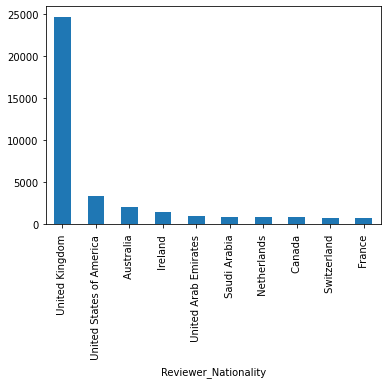

In [44]:
#Top 10 count of hotel reviews based on Nationality
# So the no of reviews are from UK 
df2.groupby(['Reviewer_Nationality'])['Reviewer_Score'].count().sort_values(ascending=False)[0:10].plot.bar()

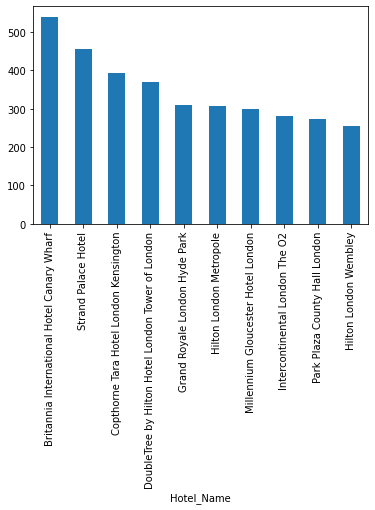

In [45]:
#plot of count of overall reviews of hotel in descending order
df2.groupby(['Hotel_Name'])['reviews'].count().sort_values(ascending=False)[0:10].plot.bar()

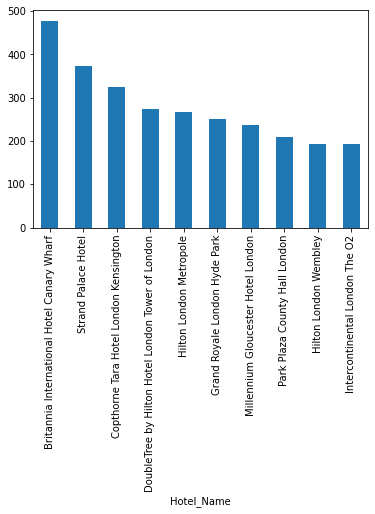

In [46]:
# count of only negative reviews excluding the 'No Negative' review to the Hotels in descending order

df2[df2['Negative_Review'] != 'No Negative'].groupby(['Hotel_Name'])['Negative_Review'].count().sort_values(ascending = False)[0:10].plot.bar()

# Inference: Britannia International Hotel got highest no. of negative reviews

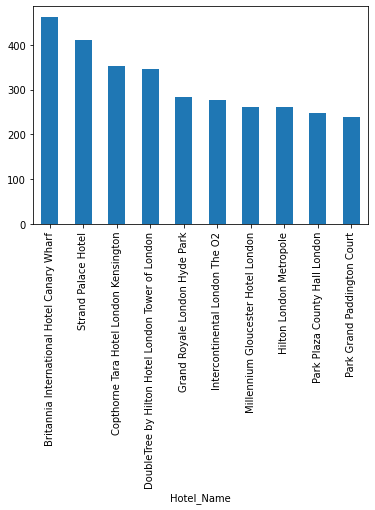

In [47]:
# count of only Postive reviews excluding the 'No Positive' review to the Hotels in descending order
df2[df2['Positive_Review'] != 'No Positive'].groupby(['Hotel_Name'])['Positive_Review'].count().sort_values(ascending=False)[0:10].plot.bar()

# Inference: Britannia International Hotel also got highest no. of Postive reviews

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


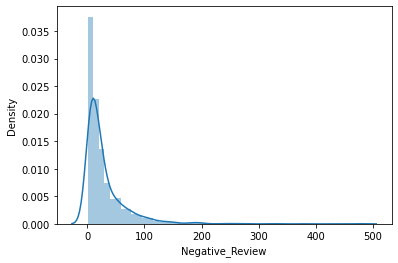

In [48]:
#Inference: Most of the Hotels got negative reviews as no. of negative reviews probability is more
#compared to the positive reviews 
import seaborn as sns
sns.distplot(df2[df2['Negative_Review'] != 'No Negative'].groupby(['Hotel_Name'])['Negative_Review'].count())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


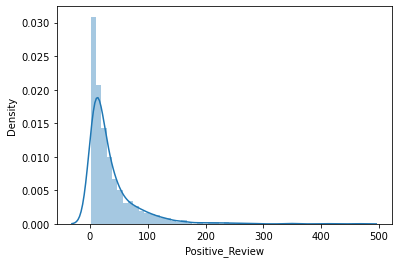

In [49]:
sns.distplot(df2[df2['Positive_Review'] != 'No Positive'].groupby(['Hotel_Name'])['Positive_Review'].count())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


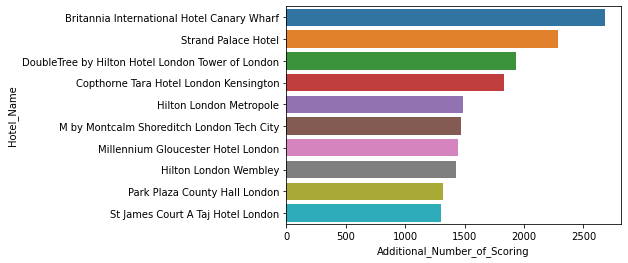

In [50]:
#Inference: 'Additional_no_of_scoring' is based on the services given by the hotel to the customers
# and hence Britannia International Hotel is in the Top 10 Hotel's providing best services
x = df2.groupby('Hotel_Name')['Additional_Number_of_Scoring'].mean().sort_values(ascending=False)[0:10].index
y = df2.groupby('Hotel_Name')['Additional_Number_of_Scoring'].mean().sort_values(ascending=False)[0:10]
sns.barplot(y,x)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


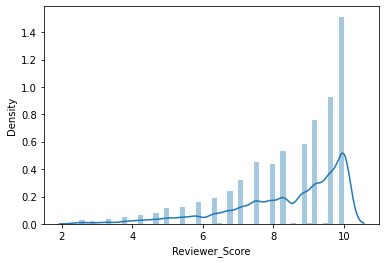

In [51]:


#we can apply USL to see how clusters are formed based on the 'Reviewer_Score'
sns.distplot(df2['Reviewer_Score'])



In [52]:
#Extracting the Country from the 'Hotel_Address' and creating the new column
df2['Hotel_Country'] = df2['Hotel_Address'].apply(lambda x: x.split()[-1])
df2['Hotel_Country'].value_counts()

Kingdom        27271
France          6545
Spain           6173
Netherlands     5349
Austria         3177
Italy           1249
Name: Hotel_Country, dtype: int64

In [54]:
#Replaced the Kingdom as 'United Kingdom' 
df2['Hotel_Country'] = df2['Hotel_Country'].replace('Kingdom','United Kingdom')

In [55]:
df2['Hotel_Country'].value_counts()

United Kingdom    27271
France             6545
Spain              6173
Netherlands        5349
Austria            3177
Italy              1249
Name: Hotel_Country, dtype: int64

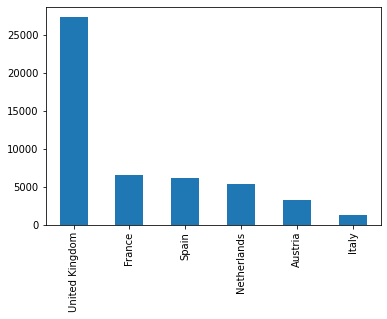

In [56]:
#hotel's across the europe
df2['Hotel_Country'].value_counts().plot.bar()

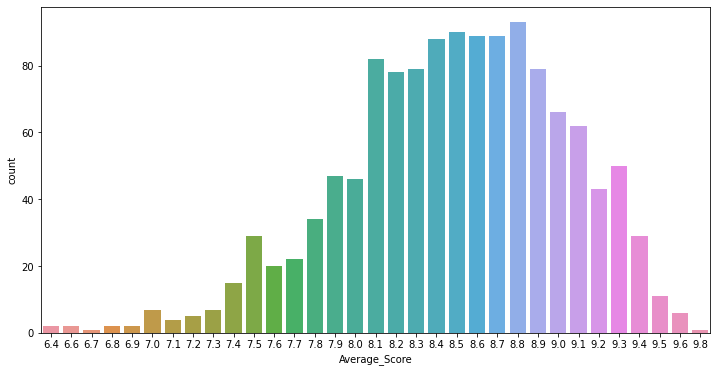

In [57]:
#our dataset contains reviwer score mostly from 8.0 to 9.0 
dataset_avg_scores = df2[['Hotel_Name','Average_Score']].drop_duplicates() # Dropping any duplicates
plt.figure(figsize = (12,6))
sns.countplot(x = 'Average_Score',data = dataset_avg_scores)

In [59]:
#highly rated hotels
df2[df2['Average_Score']>=7][['Hotel_Name','Hotel_Country','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by='Total_Number_of_Reviews',ascending=False)[0:10]

,Hotel_Name,Hotel_Country,Average_Score,Total_Number_of_Reviews
112,Strand Palace Hotel,United Kingdom,8.1,9568.0
361,Britannia International Hotel Canary Wharf,United Kingdom,7.1,9086.0
70,Best Western Premier Hotel Couture,Netherlands,8.7,8177.0
90,Golden Tulip Amsterdam West,Netherlands,8.5,7586.0
128,DoubleTree by Hilton Hotel London Tower of London,United Kingdom,8.7,7491.0
443,Glam Milano,Italy,8.8,7371.0
378,Jaz Amsterdam,Netherlands,8.9,7108.0
7,Copthorne Tara Hotel London Kensington,United Kingdom,8.1,7105.0
271,Hilton London Metropole,United Kingdom,7.5,6977.0
216,Catalonia Atenas,Spain,7.9,6792.0


In [60]:
#least rated hotels
df2[df2['Average_Score']<=7][['Hotel_Name','Hotel_Country','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by='Total_Number_of_Reviews',ascending=False)[0:10]

,Hotel_Name,Hotel_Country,Average_Score,Total_Number_of_Reviews
420,Henry VIII,United Kingdom,7.0,2937.0
136,Bloomsbury Palace Hotel,United Kingdom,6.8,2751.0
343,Commodore Hotel,United Kingdom,6.7,2400.0
448,Hotel Cavendish,United Kingdom,6.4,2275.0
776,Park Lane Mews Hotel,United Kingdom,7.0,2061.0
822,Gainsborough Hotel,United Kingdom,6.9,1884.0
2044,Savoy Hotel Amsterdam,Netherlands,6.4,995.0
1212,Hallmark Hotel London Chigwell Prince Regent,United Kingdom,6.9,747.0
2708,London Elizabeth Hotel,United Kingdom,7.0,618.0
5542,Best Western Maitrise Hotel Edgware Road,United Kingdom,6.6,461.0


In [61]:
#We have taken random sample hence average_score and reviewer_score(mean) is differeing
# it will be same if we consider the whole dataset
pd.pivot_table(data= df2,index = 'Hotel_Name',values=['Reviewer_Score','Average_Score'])

,Average_Score,Reviewer_Score
Hotel_Name,,
11 Cadogan Gardens,8.7,8.968750
1K Hotel,7.7,7.209091
25hours Hotel beim MuseumsQuartier,8.8,8.837288
41,9.6,9.777778
88 Studios,8.4,8.456250
...,...,...
citizenM London Bankside,9.1,9.165294
citizenM London Shoreditch,9.1,9.132609
citizenM Tower of London,9.1,9.118033


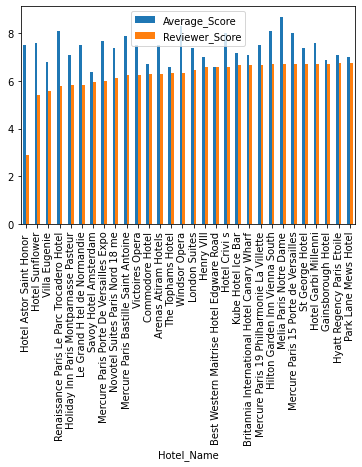

In [62]:
#
pd.pivot_table(data= df2,index = 'Hotel_Name',values=['Reviewer_Score','Average_Score']).sort_values(by='Reviewer_Score',ascending=True)[:30].plot.bar()

In [63]:
# Inference: Hotels where there was no review but still reviewe_score was given by reviewer
df_pos = df2[df2['Positive_Review'] == 'No Positive'].groupby(['Hotel_Name'])['Reviewer_Score']#.sum().sort_values(ascending = False)[0:10].plot.bar()

df_pos.describe()[df_pos.describe()['count'] > 30][['mean','count']].sort_values(by='mean',ascending = False)[0:30]#.plot.bar()

,mean,count
Hotel_Name,,
Strand Palace Hotel,7.087234,47.0
Copthorne Tara Hotel London Kensington,7.075610,41.0
Millennium Gloucester Hotel London,6.586111,36.0
Hilton London Metropole,6.093478,46.0
Britannia International Hotel Canary Wharf,5.622078,77.0


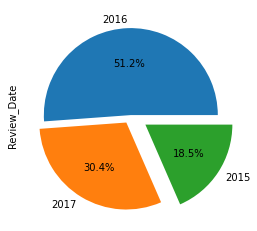

In [64]:
# more no. of reviews are recorded in the year 2016
df2.Review_Date.str[-4:].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=[0,0.1,0.2])
plt.show()

In [65]:
#Here Review_Date is a str 
# and extracting the year and month from the date 
# and storing as yyyymm as one column/feature
yr = df2.Review_Date.str[-4:]  
month =df2.Review_Date.str[:2]
month = month.apply(lambda x:x.replace('/',''))
# df2['year_Month'] = ((df2.Review_Date.str[-4:].astype(int)*100)+(df2.Review_Date.str[:2].astype(int))).astype(str)
df2['year_Month'] = ((yr.astype(int)*100)+(month.astype(int))).astype(str)
df2['review_month'] = month
df2['year_Month'].value_counts()

201608    2590
201607    2430
201610    2294
201707    2244
201605    2238
201701    2233
201705    2215
201609    2127
201604    2121
201612    2099
201703    2078
201606    2052
201603    2025
201706    2007
201704    2003
201702    1952
201601    1924
201509    1923
201510    1913
201602    1862
201508    1799
201512    1796
201511    1754
201611    1697
201708     388
Name: year_Month, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


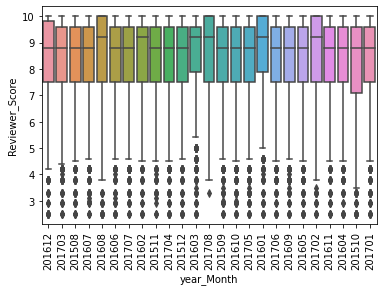

In [66]:
sns.boxplot(df2['year_Month'],df2.Reviewer_Score)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


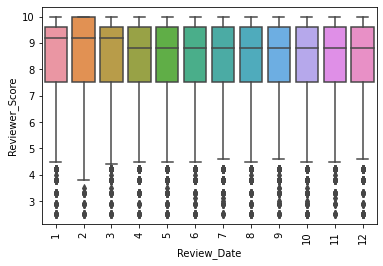

In [67]:
#month wise 
month.astype(int)
sns.boxplot(month.astype(int),df2.Reviewer_Score)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


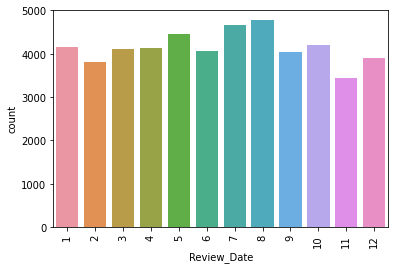

In [68]:


sns.countplot(month.astype(int))
plt.xticks(rotation=90)
plt.show()



In [69]:
df2.groupby(['Reviewer_Nationality','review_month']).Reviewer_Score.describe()

count   mean       std  ...   50%   75%   max
Reviewer_Nationality review_month                          ...                  
                     1               4.0  8.350  1.479865  ...  8.15   9.4  10.0
                     10              5.0  7.420  2.115892  ...  7.50   8.3  10.0
                     11              4.0  8.575  1.596611  ...  9.00   9.4  10.0
                     12              5.0  8.320  1.779607  ...  8.30  10.0  10.0
                     2               5.0  7.600  2.452550  ...  8.30   9.2  10.0
...                                  ...    ...       ...  ...   ...   ...   ...
 Zimbabwe            1               1.0  7.900       NaN  ...  7.90   7.9   7.9
                     10              1.0  9.200       NaN  ...  9.20   9.2   9.2
                     11              1.0  6.300       NaN  ...  6.30   6.3   6.3
                     5               1.0  7.900       NaN  ...  7.90   7.9   7.9
                     9               4.0  8.775  1.744276  ...  9.40  10.0  10.0

[1319 rows x 8 columns]

In [70]:
# 'Reviewer_Nationality' columns contains spaces .
# treating the spaces as replacing it with 'Others'
df2['Reviewer_Nationality'] = df2['Reviewer_Nationality'].replace(' ','Others')

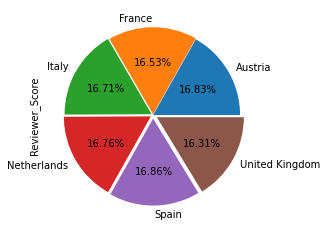

In [71]:
# df.groupby('Hotel_Country')['Reviewer_Score'].mean()
# country wise average review_score 
df2.groupby('Hotel_Country')['Reviewer_Score'].mean().plot(kind='pie', autopct='%2.2f%%',explode = [0,0.01,0.02,0.03,0.04,0.05])
plt.show()

In [72]:
!pip install wordcloud


In [73]:
#df_pos_neg = df2['reviews']

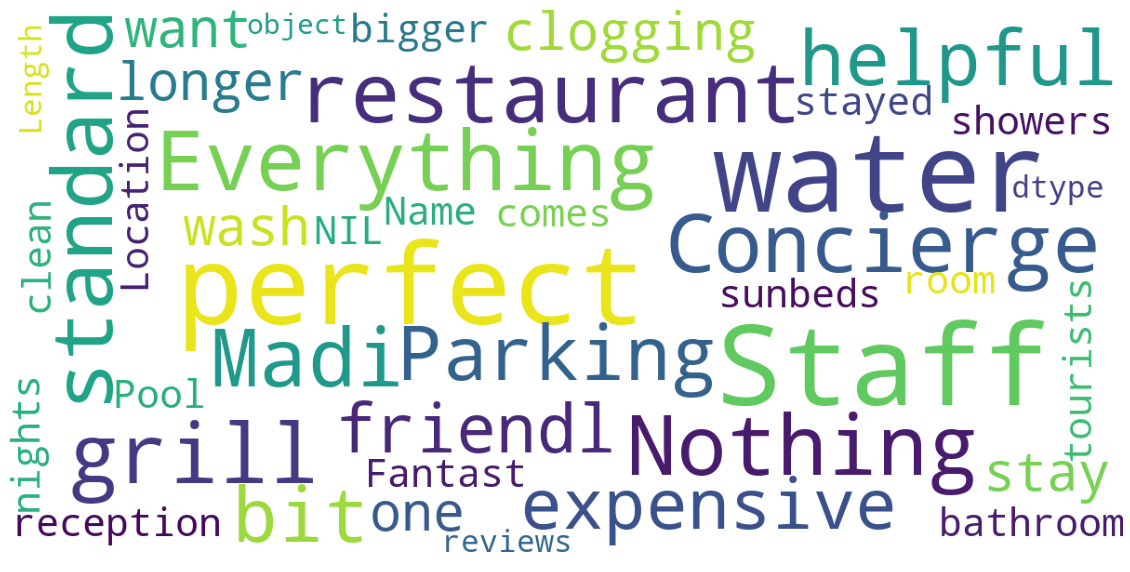

In [74]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(df_pos_neg, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 75,
        max_font_size = 40, 
        scale = 3,
#         random_state = 42
    ).generate(str(df_pos_neg))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(df2['reviews'])

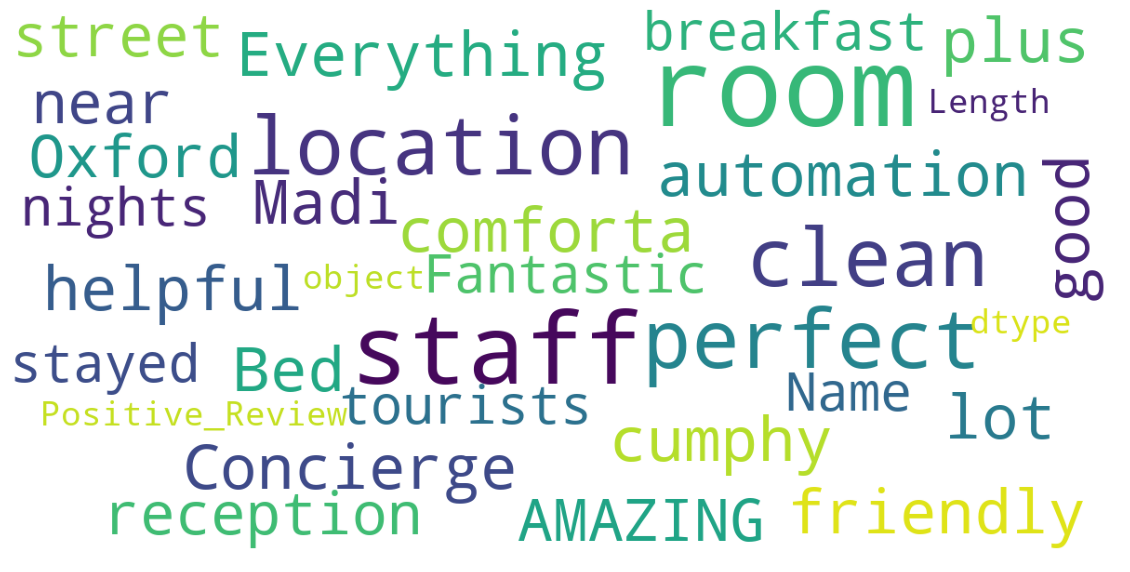

In [75]:


# cloud count for positive review
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(df_pos_neg, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 75,
        max_font_size = 40, 
        scale = 3,
#         random_state = 42
    ).generate(str(df_pos_neg))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(df2['Positive_Review'])



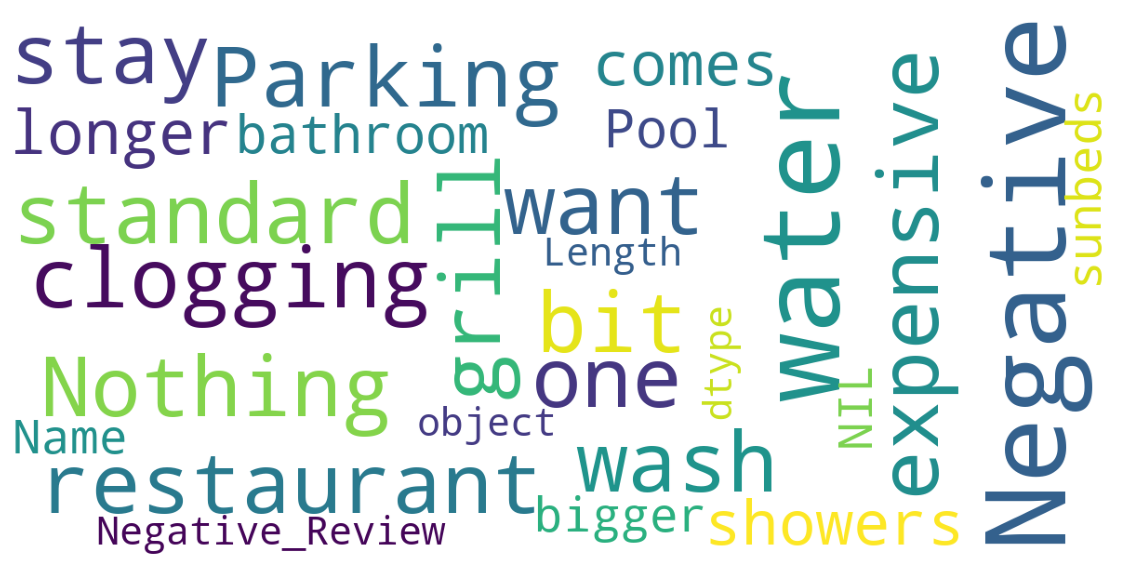

In [76]:
# cloud count for negative review
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(df_pos_neg, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 75,
        max_font_size = 40, 
        scale = 3,
#         random_state = 42
    ).generate(str(df_pos_neg))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(df2['Negative_Review'])

In [77]:


# df2[['Hotel_Name','Positive_Review','Negative_Review']].head()
#Negative and positive review ratio wrt Hotel name



In [78]:
!pip install chart-studio

     |████████████████████████████████| 71kB 3.1MB/s 


In [79]:
#  Using latitude and longitude, you can show the distribution of hotels in Europe using a map.
# import plotly.plotly as py
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [80]:
#dropping the reset index columns
df2=df2.drop('index',axis=1)
df2.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,reviews,Hotel_Country,year_Month,review_month
0,22 Hertsmere Road Tower Hamlets London E14 4ED...,930,12/9/2016,8.9,London Marriott Hotel West India Quay,United Kingdom,The grill restaurant was very below standard ...,32.0,2836.0,Bed was very cumphy good location staff were ...,11.0,1.0,5.8,"[' Leisure trip ', ' Couple ', ' Deluxe King R...",237 day,51.507271,-0.021121,The grill restaurant was very below standard ...,United Kingdom,201612,12
1,Gutheil Schoder Gasse 7B 10 Favoriten 1100 Vie...,283,3/8/2017,8.3,Austria Trend Hotel Bosei Wien,Montenegro,Nothing,2.0,3287.0,Everything,2.0,4.0,9.6,"[' Business trip ', ' Solo traveler ', ' Class...",148 day,48.162974,16.340402,Nothing Everything,Austria,201703,3
2,Mandeville Place Westminster Borough London W1...,495,8/19/2015,8.5,The Mandeville Hotel,Qatar,No Negative,0.0,2300.0,Concierge Madi is perfect and he is very helpful,10.0,1.0,7.9,"[' Leisure trip ', ' Couple ', ' Superior Doub...",715 day,51.516516,-0.150973,Concierge Madi is perfect and he is very helpful,United Kingdom,201508,8
3,Joan Muyskenweg 10 Oost 1096 CJ Amsterdam Neth...,474,7/1/2016,8.2,Mercure Hotel Amsterdam City South,Spain,Parking was a bit expensive,6.0,3568.0,Staff was friendly Rooms where clean comforta...,13.0,1.0,9.6,"[' Leisure trip ', ' Group ', ' 2 rooms ', ' S...",398 day,52.335182,4.913869,Parking was a bit expensive Staff was friendl...,Netherlands,201607,7
4,Ferdinand Bolstraat 333 Oud Zuid 1072 LH Amste...,383,8/18/2016,8.9,Hotel Okura Amsterdam,New Zealand,There was water clogging in one of the wash b...,30.0,2295.0,lot of automation in the room plus the room i...,32.0,1.0,9.6,"[' Leisure trip ', ' Couple ', ' Superior Doub...",350 day,52.348764,4.893883,There was water clogging in one of the wash b...,Netherlands,201608,8


In [81]:
df2.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,reviews,Hotel_Country,year_Month,review_month
0,22 Hertsmere Road Tower Hamlets London E14 4ED...,930,12/9/2016,8.9,London Marriott Hotel West India Quay,United Kingdom,The grill restaurant was very below standard ...,32.0,2836.0,Bed was very cumphy good location staff were ...,11.0,1.0,5.8,"[' Leisure trip ', ' Couple ', ' Deluxe King R...",237 day,51.507271,-0.021121,The grill restaurant was very below standard ...,United Kingdom,201612,12
1,Gutheil Schoder Gasse 7B 10 Favoriten 1100 Vie...,283,3/8/2017,8.3,Austria Trend Hotel Bosei Wien,Montenegro,Nothing,2.0,3287.0,Everything,2.0,4.0,9.6,"[' Business trip ', ' Solo traveler ', ' Class...",148 day,48.162974,16.340402,Nothing Everything,Austria,201703,3
2,Mandeville Place Westminster Borough London W1...,495,8/19/2015,8.5,The Mandeville Hotel,Qatar,No Negative,0.0,2300.0,Concierge Madi is perfect and he is very helpful,10.0,1.0,7.9,"[' Leisure trip ', ' Couple ', ' Superior Doub...",715 day,51.516516,-0.150973,Concierge Madi is perfect and he is very helpful,United Kingdom,201508,8
3,Joan Muyskenweg 10 Oost 1096 CJ Amsterdam Neth...,474,7/1/2016,8.2,Mercure Hotel Amsterdam City South,Spain,Parking was a bit expensive,6.0,3568.0,Staff was friendly Rooms where clean comforta...,13.0,1.0,9.6,"[' Leisure trip ', ' Group ', ' 2 rooms ', ' S...",398 day,52.335182,4.913869,Parking was a bit expensive Staff was friendl...,Netherlands,201607,7
4,Ferdinand Bolstraat 333 Oud Zuid 1072 LH Amste...,383,8/18/2016,8.9,Hotel Okura Amsterdam,New Zealand,There was water clogging in one of the wash b...,30.0,2295.0,lot of automation in the room plus the room i...,32.0,1.0,9.6,"[' Leisure trip ', ' Couple ', ' Superior Doub...",350 day,52.348764,4.893883,There was water clogging in one of the wash b...,Netherlands,201608,8
